In [1]:
%matplotlib inline
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sys.path.insert(0,os.path.abspath('..'))
from Scripts.methodChain import *

plt.rc("axes.spines", top=False, right=False)

# Cleaning up data
We have created a script called methodChain that contains chained methods load_and_processText() as well as load_and_processSlang() which gets rid of uneccessary columns in our datasets. The cleaned up datasets are then loaded into df - list of text inputs - and dfSlang - list of abbreviations and the corresponding keys.

In [2]:
df = load_and_processText()
dfSlang = load_and_processSlang()

## df: List of text inputs

In [3]:
df

,text
0,Another update 20th February and still no biom...
1,I've had nothing but positive experiences with...
2,"Great app that I use almost every day, would b..."
3,"Update: After some updates, this app is much e..."
4,AMAZON IS NO. 1 🌹🌹HAVE BEEN ORDERING FROM AMAZ...
...,...
74635,"Great app,add the edit text, so one cant easil..."
74636,"GUE MO KOMPLEN, INI TOMBOL CALL AMA OPTION NYA..."
74637,Not working properly. All the time restart aap.
74638,HTC one x Didn't get the camera feature in rec...


# Implementation of pseudocode
We've created a function called implementation which takes a text input, finds all abbreviations and replace them with the corresponding key.

In [4]:
def implementation(tweet):
    found = 0
    array = dfSlang.to_numpy()
    tweet.lower()
    for i in range(len(array)):
        try:
            found = tweet.index(array[i][0])
        except (ValueError, TypeError):
            found=-1
        if found>-1:
            punct = [""," ",".", ",","!","?"]
            if found == 0 or tweet[(found-1):found] in punct:
                tweet = tweet.replace(array[i][0],array[i][1])
    return tweet

# Test case and output
Here is a sample text input with some abbreviations that we've tested with our implementation function.

In [5]:
sample = "we're still meeting at 8pm afaik. if anything changes i'll send you the deets. cu l8r and tc."
implementation(sample)


"we're still meeting at 8pm as far as I know. if anything changes i'll send you the details. see you later and take care."

# Plots of different input sizes


In [6]:
from tryItABunch import tryItABunch
nValuesNaive, tValuesNaive = tryItABunch(implementation, startN = 148, endN = 25000, stepSize=74, numTrials=5, listMax = 10)

Text(0.5, 1.0, 'Original Naive algorithm')

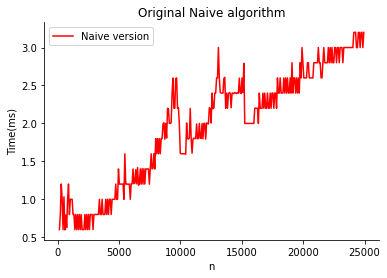

In [7]:
plt.plot(nValuesNaive, tValuesNaive,color="red", label="Naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Original Naive algorithm")

In [8]:
from tryItABunch2 import tryItABunch2
nValuesNaive2, tValuesNaive2 = tryItABunch2(startN = 148, endN = 25000, stepSize=74, numTrials=5)

Text(0.5, 1.0, 'Naive algorithm verus Om+n')

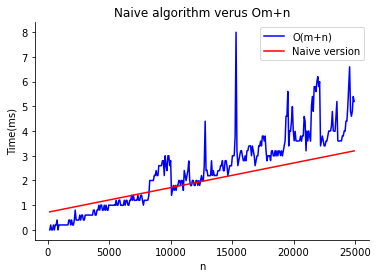

In [9]:
m, b = np.polyfit(nValuesNaive, tValuesNaive, 1)
nValuesNaiveNP = np.array(nValuesNaive)
plt.plot(nValuesNaive2, tValuesNaive2,color="blue", label="O(m+n)")
plt.plot(nValuesNaive, m*nValuesNaiveNP+ b,color="red", label="Naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive algorithm verus Om+n")